<a href="https://colab.research.google.com/github/nbahukhandi/KnowledgeSharing/blob/master/Lida_CompressorsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lida

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.7/249.7 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.0

In [2]:
from google.colab import userdata
api_key=userdata.get("OpenAI_Oct24")
from lida import Manager, TextGenerationConfig, llm
lida=Manager(text_gen=llm("openai", api_key=api_key))
textgen_config=TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini-2024-07-18", user_cache=True)

In [3]:
summary=lida.summarize("/content/data.csv", summary_method="default", textgen_config=textgen_config)
goals =lida.goals(summary, n=2, textgen_config=textgen_config)
for goal in goals:
  display(goal)


### Goal 0
---
**Question:** What is the relationship between motor power and torque?

**Visualization:** `scatter plot of motor_power vs torque`

**Rationale:** This visualization uses the 'motor_power' and 'torque' fields to explore how motor power affects torque output. A scatter plot will allow us to see if there is a correlation between these two variables, which is crucial for understanding the performance characteristics of the motor.



### Goal 1
---
**Question:** How does noise level vary with RPM and what are the implications?

**Visualization:** `line chart of noise_db vs rpm`

**Rationale:** This visualization utilizes the 'noise_db' and 'rpm' fields to analyze how noise levels change with varying RPM. A line chart is appropriate here as it will clearly show trends over the RPM range, helping identify operational ranges that may lead to excessive noise, which is important for maintenance and operational efficiency.


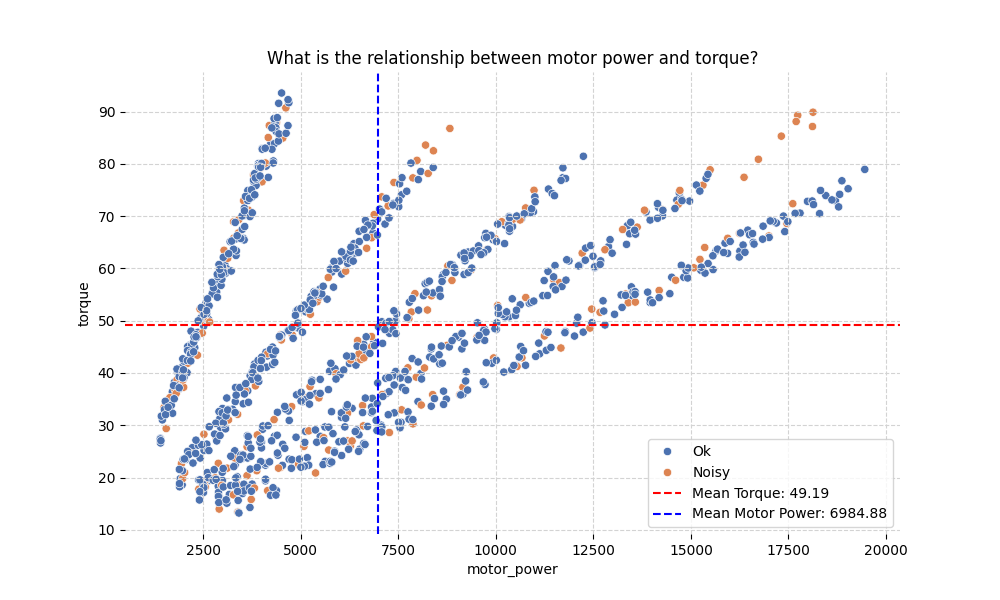

In [4]:
i=0
library="seaborn"
textgen_config=TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts=lida.visualize(summary=summary,goal=goals[i], textgen_config=textgen_config, library=library)
charts[0]

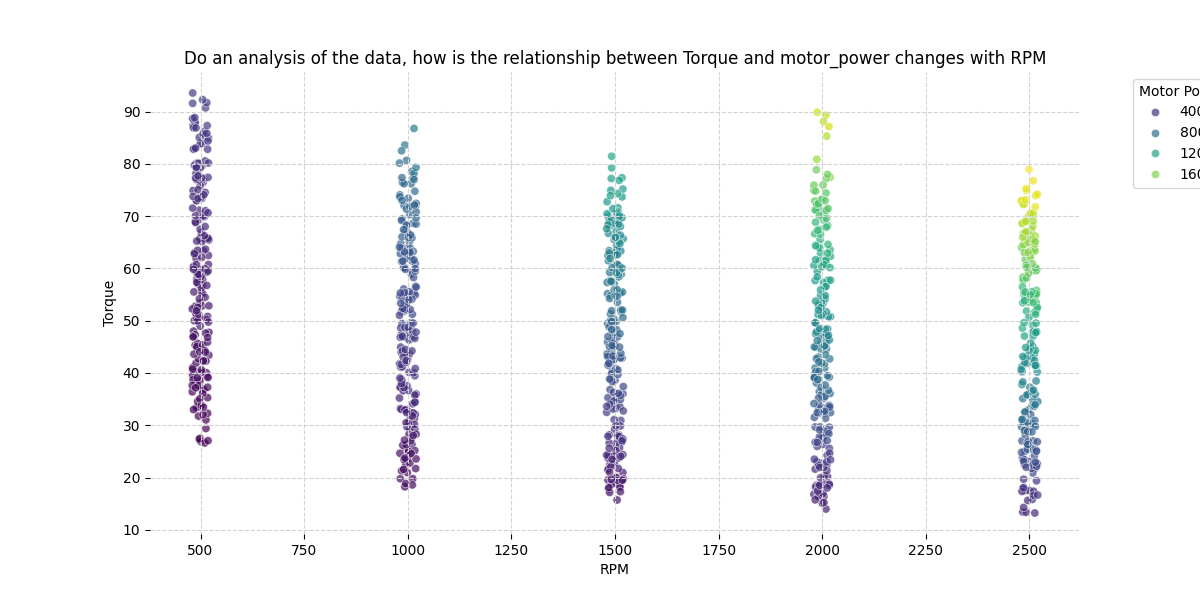

In [5]:
user_query="Do an analysis of the data, how is the relationship between Torque and motor_power changes with RPM"
textgen_config=TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts=lida.visualize(summary=summary,goal=user_query, textgen_config=textgen_config)
charts[0]

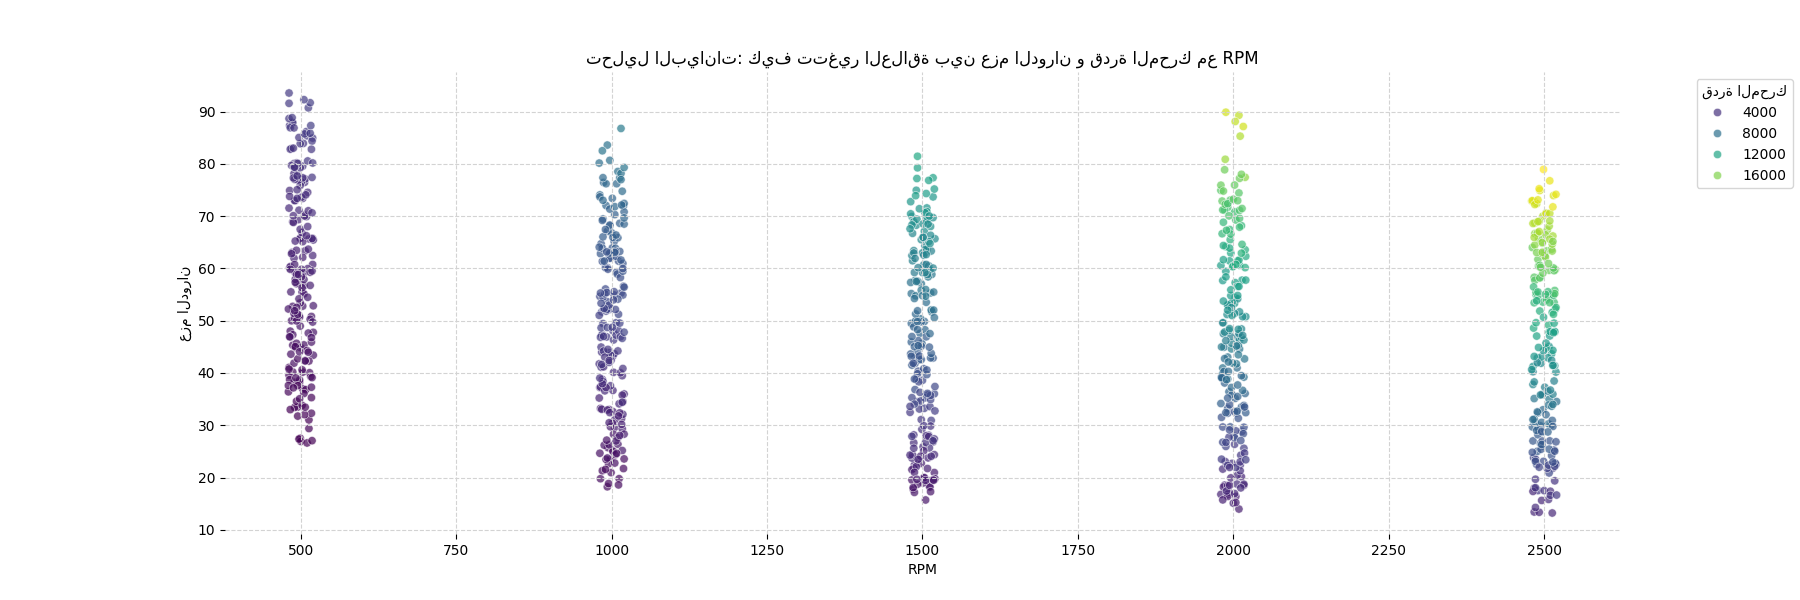

In [8]:
code=charts[0].code
textgen_config=TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions=["make chart width 3 times the height", "translate the chart to arabic"]
edited_charts=lida.edit(code=code, summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

In [9]:
explainations=lida.explain(code=code, library=library, textgen_config=textgen_config)
for row in explainations[0]:
  print(row["section"],"**", row["explanation"])

accessibility ** The chart is a scatter plot that visually represents the relationship between Torque and motor_power with RPM as a hue. The colors are derived from the 'viridis' palette, which provides a gradient of colors to distinguish different levels of motor power. The goal of the chart is to analyze how the relationship between Torque and motor_power changes with varying RPM values. Key insights can be drawn from the distribution of points, indicating how Torque varies with RPM and how motor power levels are represented through color.
transformation ** In this code, there are no explicit data transformations such as filtering, aggregation, or grouping. The data is directly used from the provided DataFrame without any modifications.
visualization ** The visualization process begins by setting the figure size to 12x6 inches. A scatter plot is created using seaborn's scatterplot function, where 'rpm' is plotted on the x-axis and 'torque' on the y-axis, with 'motor_power' determinin

<string>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no 

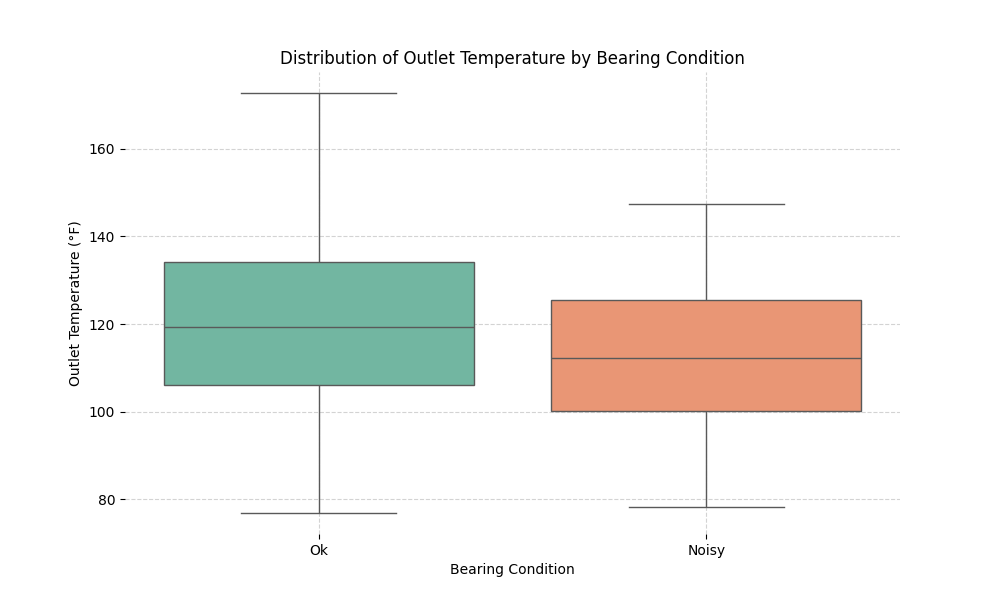

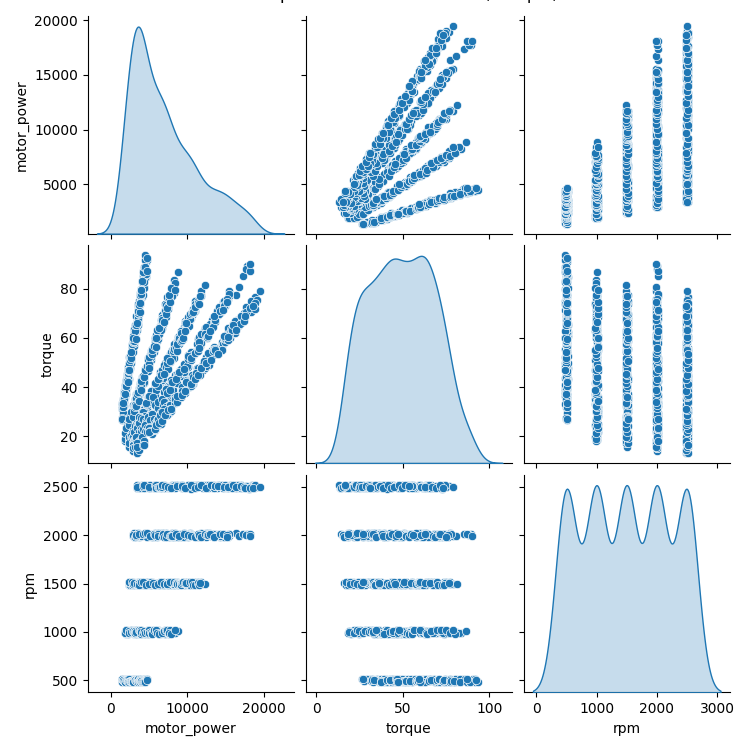

<Figure size 1200x1200 with 0 Axes>

In [11]:
textgen_config=TextGenerationConfig(n=2, temperature=0, use_cache=True)
recomended_charts=lida.recommend(code=code, summary=summary,n=2, textgen_config=textgen_config)
for chart in recomended_charts:
  display(chart)

In [13]:
evaluations=lida.evaluate(code=code, goal=goals[i], textgen_config=textgen_config, library=library)[0]
for eval in evaluations:
  print(eval["dimension"], "Score", eval["score"],"/10")
  print("\t", eval["rationale"][:200])
  print("\t*************************")


bugs Score 10 /10
	 There are no syntax errors, logic errors, or typos in the code. The code should compile and run successfully.
	*************************
transformation Score 8 /10
	 The data appears to be used appropriately for the visualization type. However, it is unclear if the data has been filtered or aggregated prior to plotting, which could enhance the clarity of the relat
	*************************
compliance Score 9 /10
	 The code meets the specified visualization goals by creating a scatter plot to analyze the relationship between torque and motor power with RPM as a hue. The title and axes are appropriately labeled.
	*************************
type Score 8 /10
	 A scatter plot is an appropriate choice for visualizing the relationship between two continuous variables (torque and RPM) with a third variable (motor power) represented by color. However, a differen
	*************************
encoding Score 9 /10
	 The data is encoded appropriately, with 'rpm' on the x-axis, 'to